# 正则化线性回归 Regularized Linear Regression

在这个练习中，你将利用水库中水位的变化来预测从大坝中排除的水量

## 可视化数据集 Visualizing the dataset

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt

from scipy.io import loadmat 

In [2]:
df = loadmat('ex5data1.mat')

- 模型的训练集：X，Y 
- 用于确定正则化参数的交叉验证集：Xval，yval
- 用于评估性能的测试集。模型在训练期间是不可见的：Xtest，ytest

In [3]:
X = df['X']
y = df['y']
Xtest = df['Xtest']
ytest = df['ytest']
Xval = df['Xval']
yval = df['yval']

In [4]:
#将数据展平
def load_data():
    df = loadmat('ex5data1.mat')
    return map(np.ravel,[df['X'],df['y'],df['Xval'],df['yval'],df['Xtest'],df['ytest']])
#X, y, Xval, yval, Xtest, ytest = load_data()

In [5]:
X.shape,y.shape

((12, 1), (12, 1))

In [6]:
Xtest.shape,ytest.shape,Xval.shape,yval.shape

((21, 1), (21, 1), (21, 1), (21, 1))

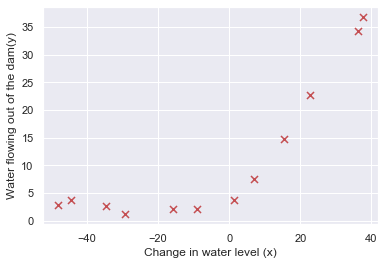

In [7]:
sns.set(style='darkgrid')
fig, ax = plt.subplots()
ax.scatter(X,y,s=50,c='r',marker='x')


ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam(y)')

plt.show()

## 代价函数

线性回归代价函数：

$$
J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})}^{2}}}\\
$$

其中：
$$
h_\theta\left( x \right)=\theta^TX\\
$$

正则化线性回归的代价函数:

$$
J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{\left[{{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})}^{2}}\right]+ \frac{\lambda}{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}}\\
$$

In [8]:
# 1.对数据进行预处理 添加新的一列
X = np.insert(X.reshape(X.shape[0], 1), 0, values=np.ones(X.shape[0]),axis=1)
Xtest = np.insert(Xtest.reshape(Xtest.shape[0], 1), 0, values=np.ones(Xtest.shape[0]),axis=1)
Xval = np.insert(Xval.reshape(Xval.shape[0], 1), 0, values=np.ones(Xval.shape[0]), axis=1)

In [9]:
# 或者使用以下代码
#X, Xtest, Xval = [np.insert(i.reshape(i.shape[0],1), 0, values=np.ones(i.shape[0]), axis=1) for i in (X, Xtest, Xval)]

In [10]:
# 2.初始化θ矩阵
theta = np.ones(X.shape[1])

In [11]:
# 3.转化为numpy矩阵
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(theta)

In [12]:
# 4.查看相关参数维度
X.shape,Xtest.shape,Xval.shape,theta.shape,y.shape

((12, 2), (21, 2), (21, 2), (1, 2), (12, 1))

In [13]:
def computerCost(theta,X,y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    inner = (X * theta.T) - y
    sum = np.sum(np.power(inner,2))
    
    return 1 / (2 * len(X)) * sum

In [14]:
def computerCostReg(theta,X,y,Rate=1):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    cost_inner = (X * theta.T) - y
    cost = 1 / (2 * len(X)) * np.sum(np.power(cost_inner,2))
    
    Reg_inner = np.sum(np.power(theta[:,1:X.shape[0]], 2))
    Reg = Rate / (2*len(X)) * Reg_inner
    
    return cost + Reg

In [15]:
# 3.计算代价函数
computerCost(theta,X,y)

303.9515255535976

In [16]:
# 4.计算正则化代价函数
computerCostReg(theta,X,y,1)

303.9931922202643

## 梯度下降 Gradient Descent

### 正则化梯度 regularized gradient

$$
\frac{\partial J(\theta)}{\partial \theta_{0}}=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)} \quad \text { for } j=0 \\
\frac{\partial J(\theta)}{\partial \theta_{j}}=\left(\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}\right)+\frac{\lambda}{m} \theta_{j} \quad \text { for } j \geq 1
$$

其中：
$$
h_\theta\left( x \right)=\theta^TX\\
$$

注意，我们实际上没有在这个函数中执行梯度下降，我们仅仅在计算一个梯度步长。

In [17]:
def gradientReg(theta,X,y,Rate=1):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    
    error = (X * theta.T) - y 
    paraters = theta.shape[1]
    grad = np.zeros(paraters)
    
    for i in range(paraters):
        inner  = (1 / len(X)) * np.sum(np.multiply(error, X[:,i]))
        
        if (i == 0):
            grad[i] = inner
        else:
            Reg = (Rate / len(X)) / theta[:,i]
            grad[i] = inner + Reg
    return grad

In [18]:
gradientReg(theta,X,y,Rate=0)

array([-15.30301567, 598.16741084])

### 高级优化 Advanced Optimization

正则化项  𝜆=0

In [19]:
import scipy.optimize as opt
result = opt.minimize(fun=computerCostReg,
                      x0=theta,
                      args=(X,y,0),
                      method='TNC',
                      jac=gradientReg,
                      options={'disp': True}
                     )
result

     fun: 22.37390649510894
     jac: array([ 2.39135078e-07, -1.24576619e-08])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 9
     nit: 4
  status: 1
 success: True
       x: array([13.08790376,  0.36777923])

## 拟合线性回归 Fitting linear regression

In [20]:
final_theta = result.x
final_theta

array([13.08790376,  0.36777923])

In [21]:
x = np.linspace(df['X'].min(),df['X'].max(),100)
f = final_theta[0] + (final_theta[1] * x)

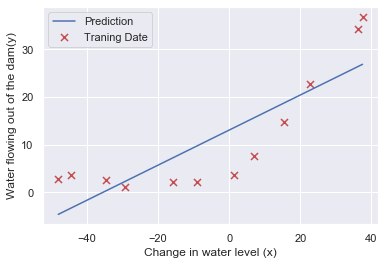

In [22]:
sns.set(style='darkgrid')
fig, ax = plt.subplots()
ax.scatter(df['X'],df['y'],s=50,c='r',marker='x',label='Traning Date')
ax.plot(x,f,'b',label = 'Prediction')

ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam(y)')

ax.legend(loc=2)
plt.show()

# 偏差和方差Bias-variance

- **偏差Bisas：**描述的是预测值（估计值）的期望与真实值之间的差距。偏差越大，越偏离真实数据     ----      `训练集`

- **方差Variance：**描述的是预测值的变化范围，离散程度，也就是离其期望值的距离。方差越大，数据的分布越分散     ----      `测试集`

1. 使用训练集的子集来拟合应模型（X(1:n,:) and y(1:n)） 

2. 在计算训练代价和交叉验证代价时，没有用正则化

3. 记住使用相同的训练集子集来计算训练代价


Training error:
$$
J_{train}(\theta) = \frac{1}{2m}\sum_\limits{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2
$$
Cross Validation error:
$$
J_{cv}(\theta) = \frac{1}{2m_{cv}}\sum_\limits{i=1}^{m}(h_{\theta}(x^{(i)}_{cv})-y^{(i)}_{cv})^2
$$

In [23]:
m = X.shape[0]   # 训练集样本数量（m）

In [24]:
def LR(X,y,Rate=1):
    theta = np.ones(X.shape[1])
    result = opt.minimize(fun=computerCostReg,
                      x0=theta,
                      args=(X,y,Rate),
                      method='TNC',
                      jac=gradientReg,
                      options={'disp': True}
                     )
    return result.x
LR(X,y,Rate=0)

array([13.08790376,  0.36777923])

为了绘制学习曲线 , 需要计算不同样本数量m下的最小化代价函数对应的θ

In [25]:
def tc_cv_cost(X,y,Xval,yval,Rate):
    trainingCost, cvCost = [], []
    m = X.shape[0]
    
    for i in range(1,m+1):
        theta = LR(X[:i,],y[:i],Rate)   
        tc = computerCost(theta,X[:i,:],y[:i])
        cv = computerCost(theta,Xval,yval)

        trainingCost.append(tc)
        cvCost.append(cv) 
    return trainingCost,cvCost

## 学习曲线 Learning curves

In [26]:
def plot_learning_curves(X,y,Xval,yval,Rate):
    trainingCost,cvCost = tc_cv_cost(X,y,Xval,yval,Rate)
    
    fig, ax = plt.subplots()
    plt.plot(np.arange(1,m+1), trainingCost, label='training cost')
    plt.plot(np.arange(1,m+1), cvCost, label='Cross-validation cost')

    plt.legend(loc=1)
    ax.set_xlabel('m(training set size)')
    ax.set_ylabel('error')
    plt.show()

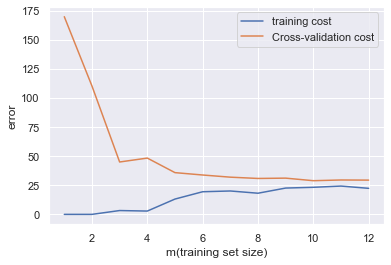

In [27]:
plot_learning_curves(X,y,Xval,yval,Rate=0)

- 当训练集增大时，误差将会增加
- 随着集合数据的增加，最终的误差会渐渐趋向于平稳

- 随着训练集的增加，交叉验证集的误差将会慢慢减小知道趋向于某一个值，因为拟合数据越多，就越能拟合出合适的假设。

根据上图学习曲线可知，当$m$很大时，训练集和交叉验证集的误差会非常接近。在这种情况属于**高偏差/欠拟合**

# 多项式回归 Polynomial regression

## 特征映射 feature mapping

如果样本量多，逻辑回归问题很复杂，而原始特征只有$x_1$可以用多项式创建更多的特征。因为更多的特征进行逻辑回归时，得到的分割线可以是任意高阶函数的形状。

$$
\text { mapFeature }(x)=\left[\begin{array}{c}
1 \\
x_{1} \\
x_{1}^{2} \\
x_{1}^{3} \\
\vdots \\
x_{1}^{6}
\end{array}\right]
$$

- 生成多项式

In [28]:
X, y, Xval, yval, Xtest, ytest = load_data()   # 注意一定要展平数据

In [29]:
def poly_features(X, power):
    data = {'f{}'.format(i): np.power(X, i) for i in range(1, power + 1)}
    return pd.DataFrame(data)

In [30]:
poly_features(X, 5)[:3] # 分别是x^1,x^2,x^3,x^4,x^5

,f1,f2,f3,f4,f5
0,-15.936758,253.980260,-4047.621971,6.450597e+04,-1.028016e+06
1,-29.152979,849.896197,-24777.006175,7.223235e+05,-2.105788e+07
2,36.189549,1309.683430,47396.852168,1.715271e+06,6.207487e+07


2. 特征归一化
       一般的解决方法：均值归一化mean normalization


$$
{{x}_{i}}=\frac{{{x}_{i}}-{{\mu}_{i}}}{S_n}
$$

In [31]:
# df.apply() 遍历DataFrame的元素 lambda表达式 默认列遍历
def normalization_features(df):
    normalization = df.apply(lambda col : (col - col.mean()) / col.std())
    return normalization.iloc[:,:].values  # 转化为列表类型

- 多项式映射 Polynomial mapping

In [32]:
power = 8

In [33]:
# 准备多项式回归数据
def prepare_poly_data(*args, power):
    def prepare(x):
        # 生成多项式
        df = poly_features(x,power)
        # 特征归一化
        nor = normalization_features(df)
        # 添加截距项
        return np.insert(nor, 0, np.ones(nor.shape[0]), axis=1)
    return [prepare(x) for x in args]        

In [34]:
X_poly,Xval_poly,Xtest_poly = prepare_poly_data(X,Xval,Xtest,power=power)
X.shape,X_poly.shape,Xval_poly.shape

((12,), (12, 9), (21, 9))

## 拟合多项式回归 Fitting Polynomial regression

正则化线性回归的代价函数:
$$
J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{\left[{{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})}^{2}}\right]+ \frac{\lambda}{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}}\\
$$

In [35]:
def cost(theta, X, y):

    m = X.shape[0]

    inner = X @ theta - y  # R(m*1)

    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)

    return cost

In [36]:
def regularized_cost(theta, X, y, l=1):
    m = X.shape[0]

    inner = X @ theta - y  # R(m*1)
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)
    
    regularized_term = (l / (2 * m)) * np.power(theta[1:], 2).sum()

    return cost + regularized_term

正则化梯度:
$$
\frac{\partial J(\theta)}{\partial \theta_{0}}=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)} \quad \text { for } j=0 \\
\frac{\partial J(\theta)}{\partial \theta_{j}}=\left(\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}\right)+\frac{\lambda}{m} \theta_{j} \quad \text { for } j \geq 1
$$

In [37]:
def regularized_gradient(theta, X, y, l=1):
    m = X.shape[0]

    regularized_term = theta.copy()  # same shape as theta
    regularized_term[0] = 0  # don't regularize intercept theta

    regularized_term = (l / m) * regularized_term
    
    inner = X.T @ (X @ theta - y)  # (m,n).T @ (m, 1) -> (n, 1)
    gradient = inner / m

    return gradient + regularized_term

In [38]:
def linear_regression_np(X, y, l=1):
    theta = np.ones(X.shape[1])

    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient,
                       options={'disp': True})
    return res.x


In [39]:
theta_poly = linear_regression_np(X_poly, y)
theta_poly

array([11.21758779,  8.58517817,  5.21269495,  3.59111706,  2.28294428,
        1.76030057,  1.0681314 ,  1.10762823,  0.39399185])

##  学习曲线 Learning curves

### 𝜆=0

我们没有使用正则化，所以  𝜆=0

In [40]:
def plot_learning_curve(X, y, Xval, yval, l=0):
    training_cost, cv_cost = [], []
    m = X.shape[0]

    for i in range(1, m + 1):
        res = linear_regression_np(X[:i, :], y[:i], l=l)

        tc = cost(res, X[:i, :], y[:i])
        cv = cost(res, Xval, yval)

        training_cost.append(tc)
        cv_cost.append(cv)

    plt.plot(np.arange(1, m + 1), training_cost, label='training cost')
    plt.plot(np.arange(1, m + 1), cv_cost, label='cv cost')
    plt.legend(loc=1)


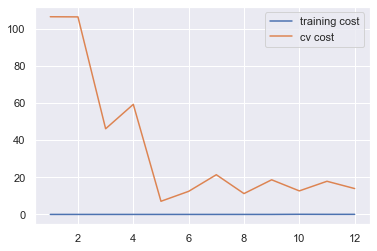

In [41]:
plot_learning_curve(X_poly, y, Xval_poly, yval, l=0)
plt.show()

根据上图可以观察到训练集代价过低，发生了过拟合

### 𝜆=1

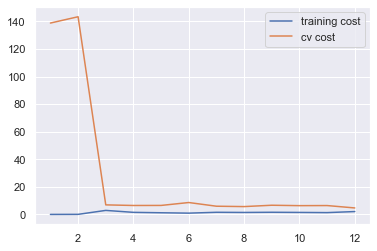

In [42]:
plot_learning_curve(X_poly, y, Xval_poly, yval, l=1)
plt.show()

根据上图可以观察到训练集代价增加，减轻了过拟合问题

### 𝜆=100

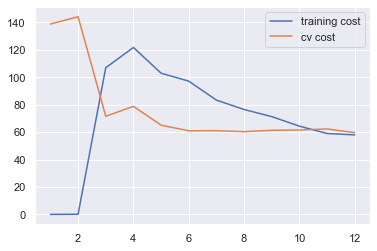

In [43]:
plot_learning_curve(X_poly, y, Xval_poly, yval, l=100)
plt.show()

根据上图可以观察到发生欠拟合问题

## 找到最佳的  𝜆

In [44]:
lambda_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
training_cost, cv_cost = [], []

In [45]:
def plot_cost_lambda(X, y, Xval, yval, l=0):
    m = X.shape[0]
    for i in lambda_candidate:
        res = linear_regression_np(X_poly, y, i)

        tc = cost(res, X_poly, y)
        cv = cost(res, Xval_poly, yval)

        training_cost.append(tc)
        cv_cost.append(cv)

    plt.xlabel('lambda')
    plt.ylabel('cost')
    
    plt.plot(lambda_candidate, training_cost, label='training cost')
    plt.plot(lambda_candidate, cv_cost, label='cv cost')
    
    plt.legend(loc=2)
    plt.show()

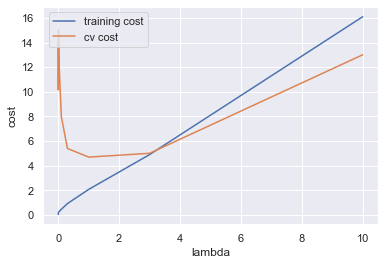

In [46]:
plot_cost_lambda(X_poly, y, Xval_poly, yval, l=0)

In [47]:
for i in lambda_candidate:
    theta = linear_regression_np(X_poly, y, i)
    print('test cost(l={}) = {}'.format(i, cost(theta, Xtest_poly, ytest)))

test cost(l=0) = 9.982275423899827
test cost(l=0.001) = 10.96403493885111
test cost(l=0.003) = 11.264458872657682
test cost(l=0.01) = 10.880094765571297
test cost(l=0.03) = 10.022266931655883
test cost(l=0.1) = 8.632063139750382
test cost(l=0.3) = 7.336640278544401
test cost(l=1) = 7.466289435179381
test cost(l=3) = 11.64393193727906
test cost(l=10) = 27.715080291767972


调参后，  𝜆=0.3  是最优选择，这个时候测试代价最小